<a href='https://colab.research.google.com/github/ishaqmarashy/red-light-traffic-violation-classification/blob/main/decision%20tree%20classifier.ipynb' target='_parent'><img src='https://colab.research.google.com/assets/colab-badge.svg' alt='Open In Colab'/></a>

In [32]:
import pandas as pd
import os

csv_filename1 = "../data/Traffic_Violations/Traffic_violations_Reduced.csv"
csv_filename2 = "../data/Climate_Data_2012_2022/3547240_cleaned.csv"
df1 = pd.read_csv(csv_filename1)
df2 = pd.read_csv(csv_filename2)

In [33]:
merged_df = pd.merge(df1, df2, left_on='DATE', right_on='DATE', how='left')

In [34]:
merged_df

,SeqID,Agency,SubAgency,Description,Location,Latitude,Longitude,Accident,Belts,Personal Injury,...,LONGITUDE,AWND,PGTM,PRCP,TMAX,WSF2,WSF5,TMIN,WDF2,WDF5
0,d0c53876-4da4-4922-ac4f-d5a7e91c7bcc,MCP,"3rd District, Silver Spring",DRIVER FAIL TO STOP AT FLASHING RED TRAFFIC SI...,FENTON ST @ COLESVILLE RD,38.997645,-77.027105,Yes,No,No,...,-75.12284,2.2,2301.0,41.1,15.6,9.8,16.1,10.0,300.0,320.0
1,e5619336-680c-4533-8055-ba7d79eec1e1,MCP,"2nd District, Bethesda",DRIVER FAILURE TO STOP AT STEADY CIRCULAR RED ...,ROCKVILLE PIKE / POOKS HILL RD,38.997566,-77.109724,Yes,No,Yes,...,-75.12284,3.4,1356.0,0.5,12.8,7.6,11.6,6.1,230.0,220.0
2,1ded33ce-acea-41c9-ae81-161af71d56e2,MCP,Headquarters and Special Operations,DRIVER FAILURE TO STOP AT STEADY CIRCULAR RED ...,NB RT355 @ LITTLE SENECA PKWY,39.223205,-77.260313,Yes,No,No,...,-75.12284,2.9,1452.0,0.0,26.7,6.7,10.7,11.1,230.0,230.0
3,b63e7cdb-fd9c-4c13-8728-8ae166a5260a,MCP,"3rd District, Silver Spring",DRIVER FAILURE TO STOP AT STEADY CIRCULAR RED ...,COLUMBIA PIKE / TECH RD,39.057987,-76.968677,Yes,No,Yes,...,-75.12284,4.0,1231.0,0.0,18.9,8.1,11.6,7.2,10.0,360.0
4,973068ac-ab88-460a-8d82-9d2d80041890,MCP,"3rd District, Silver Spring",DRIVER FAIL TO STOP AT STEADY CIRCULAR RED SIGNAL,SPRING ST @ COLEVILLE RD,38.999282,-77.026098,Yes,No,No,...,-75.12284,0.9,2212.0,4.3,20.6,4.5,6.7,11.1,320.0,320.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1781,cdd9b30e-9c82-471b-aec5-77cfdd182d37,MCP,"4th District, Wheaton",DRIVER FAIL TO STOP AT FLASHING RED TRAFFIC SI...,BOWIE MILL ROAD @ CASHELL ROAD,0.000000,0.000000,Yes,No,No,...,-75.12284,1.5,932.0,0.0,22.2,5.4,8.1,13.3,30.0,30.0
1782,116fd1e4-0a9c-4cc1-b147-866974780e6b,MCP,"4th District, Wheaton",MOTOR VEH W/O REQUIRED STOP LAMPS EQUIPMENT,CONNECTICUT AVE @ ASPEN HILL ROAD,0.000000,0.000000,Yes,No,No,...,-75.12284,1.0,1613.0,0.0,22.2,2.2,3.1,8.3,20.0,360.0
1783,569ca511-ce44-4b97-aad3-783c36172735,MCP,"4th District, Wheaton",DRIVER FAIL TO STOP AT FLASHING RED TRAFFIC SI...,CASHELL ROAD @ MORNINGWOOD DRIVE,0.000000,0.000000,Yes,No,No,...,-75.12284,0.8,1159.0,0.0,23.3,3.6,6.3,6.7,160.0,200.0
1784,d81c6100-f5c4-4451-950a-c7482cad81e5,MCP,"4th District, Wheaton",MOTOR VEH. W/O REQUIRED STOP LAMPS EQUIPMENT,GEORGIA AVE @ HINES ROAD,39.144320,-77.067415,Yes,No,No,...,-75.12284,3.8,1519.0,0.0,9.4,8.9,13.0,1.1,290.0,310.0


In [35]:
merged_df.isna().sum()

SeqID                         0
Agency                        0
SubAgency                     0
Description                   0
Location                      0
Latitude                      0
Longitude                     0
Accident                      0
Belts                         0
Personal Injury               0
Property Damage               0
Fatal                         0
Commercial License            0
HAZMAT                        0
Commercial Vehicle            0
Alcohol                       0
Work Zone                     0
Search Conducted           1294
Search Disposition         1741
Search Outcome             1313
Search Reason              1741
Search Reason For Stop     1295
Search Type                1741
Search Arrest Reason       1747
State                         0
VehicleType                   0
Year                          1
Make                          0
Model                         0
Color                         5
Violation Type                0
Charge  

In [36]:
merged_df.drop(columns=['Search Conducted','Search Disposition','Search Outcome',
                                    'Search Reason','Search Reason For Stop','Search Type',
                                    'Search Arrest Reason','Arrest Type','SubAgency','Agency'
                                    ,'SeqID','Description','Location','Geolocation'],inplace=True)

In [37]:
merged_df.columns 

Index(['Latitude', 'Longitude', 'Accident', 'Belts', 'Personal Injury',
       'Property Damage', 'Fatal', 'Commercial License', 'HAZMAT',
       'Commercial Vehicle', 'Alcohol', 'Work Zone', 'State', 'VehicleType',
       'Year', 'Make', 'Model', 'Color', 'Violation Type', 'Charge', 'Article',
       'Contributed To Accident', 'Race', 'Gender', 'Driver City',
       'Driver State', 'DL State', 'DV', 'DATE', 'LATITUDE', 'LONGITUDE',
       'AWND', 'PGTM', 'PRCP', 'TMAX', 'WSF2', 'WSF5', 'TMIN', 'WDF2', 'WDF5'],
      dtype='object')

In [38]:
merged_df

,Latitude,Longitude,Accident,Belts,Personal Injury,Property Damage,Fatal,Commercial License,HAZMAT,Commercial Vehicle,...,LONGITUDE,AWND,PGTM,PRCP,TMAX,WSF2,WSF5,TMIN,WDF2,WDF5
0,38.997645,-77.027105,Yes,No,No,No,No,No,No,No,...,-75.12284,2.2,2301.0,41.1,15.6,9.8,16.1,10.0,300.0,320.0
1,38.997566,-77.109724,Yes,No,Yes,No,No,No,No,No,...,-75.12284,3.4,1356.0,0.5,12.8,7.6,11.6,6.1,230.0,220.0
2,39.223205,-77.260313,Yes,No,No,Yes,No,No,No,No,...,-75.12284,2.9,1452.0,0.0,26.7,6.7,10.7,11.1,230.0,230.0
3,39.057987,-76.968677,Yes,No,Yes,No,No,No,No,No,...,-75.12284,4.0,1231.0,0.0,18.9,8.1,11.6,7.2,10.0,360.0
4,38.999282,-77.026098,Yes,No,No,Yes,No,No,No,No,...,-75.12284,0.9,2212.0,4.3,20.6,4.5,6.7,11.1,320.0,320.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1781,0.000000,0.000000,Yes,No,No,No,No,No,No,No,...,-75.12284,1.5,932.0,0.0,22.2,5.4,8.1,13.3,30.0,30.0
1782,0.000000,0.000000,Yes,No,No,No,No,No,No,No,...,-75.12284,1.0,1613.0,0.0,22.2,2.2,3.1,8.3,20.0,360.0
1783,0.000000,0.000000,Yes,No,No,No,No,No,No,No,...,-75.12284,0.8,1159.0,0.0,23.3,3.6,6.3,6.7,160.0,200.0
1784,39.144320,-77.067415,Yes,No,No,No,No,No,No,No,...,-75.12284,3.8,1519.0,0.0,9.4,8.9,13.0,1.1,290.0,310.0


In [39]:
merged_df['Longitude']

0      -77.027105
1      -77.109724
2      -77.260313
3      -76.968677
4      -77.026098
          ...    
1781     0.000000
1782     0.000000
1783     0.000000
1784   -77.067415
1785     0.000000
Name: Longitude, Length: 1786, dtype: float64

In [40]:
merged_df['Latitude']

0       38.997645
1       38.997566
2       39.223205
3       39.057987
4       38.999282
          ...    
1781     0.000000
1782     0.000000
1783     0.000000
1784    39.144320
1785     0.000000
Name: Latitude, Length: 1786, dtype: float64

https://geopandas.org/en/stable/gallery/create_geopandas_from_pandas.html

https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.html

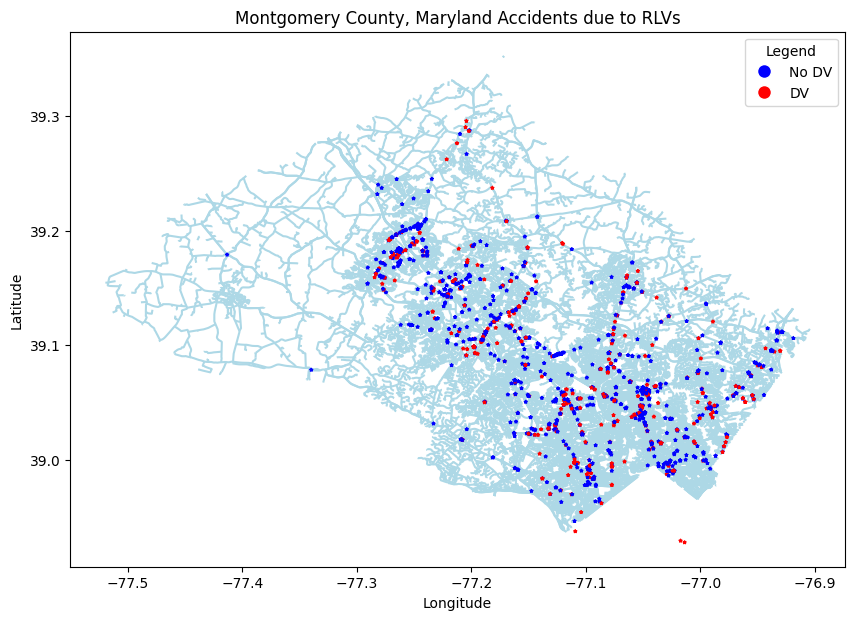

In [45]:
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point

filtered_df = merged_df[(merged_df['Latitude'] != 0) & (merged_df['Longitude'] != 0) & (merged_df['Longitude'] <= -76.9)]
montgomery_shapefile_path = '../data/roads/tl_2019_24031_roads.shp'
montgomery_gdf = gpd.read_file(montgomery_shapefile_path)

geometry = [Point(xy) for xy in zip(filtered_df['Longitude'], filtered_df['Latitude'])]
geo_points = gpd.GeoDataFrame(filtered_df, geometry=geometry)

fig, ax = plt.subplots(figsize=(10, 10))

montgomery_gdf.plot(ax=ax, color='lightblue', edgecolor='black', zorder=1)
geo_points.plot(ax=ax, marker='*', color=filtered_df['DV'].map({0: 'blue', 1: 'red'}), markersize=5, zorder=2)

legend_labels = {0: 'No DV', 1: 'DV'}
ax.legend([plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10),
           plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10)],
          [legend_labels[0], legend_labels[1]], title='Legend', loc='upper right')

ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
plt.title('Montgomery County, Maryland Accidents due to RLVs')
plt.show()


In [ ]:
csv_filename3 = "../data/tv_asos.csv"
merged_df.to_csv(csv_filename3)